In [1]:
import scipy as sp
from scipy import stats, optimize, interpolate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

# 27절: 베르누이 분포와 이항 분포

# 베르누이 확률 분포

## 베르누이 시도

결과가 성공(Success) 혹은 실패(Fail) 두 가지 중 하나로만 나오는 것

## 베르누이 분포

확률 질량 함수(pmf: probability mass function)로 정의

$\text{Bern}(x;\theta) = 
\begin{cases} 
\theta   & \text{if }x=1, \\
1-\theta & \text{if }x=0
\end{cases}$

하나의 수식으로 표현

$\text{Bern}(x;\theta) = \theta^x(1-\theta)^{(1-x)}$

## SciPy를 사용한 베르누이 분포의 시뮬레이션

rv.pmf(xx) : 확률 질량 함수(pmf: probability mass function)를 계산<br>
p 모수 $\theta$

<Container object of 2 artists>

(-1, 2)

(0, 1)

([<matplotlib.axis.XTick at 0xabce0f0>, <matplotlib.axis.XTick at 0xabf8f28>],
 <a list of 2 Text xticklabel objects>)

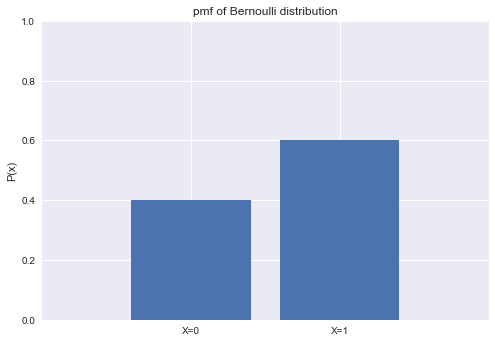

In [2]:
theta = 0.6
rv = sp.stats.bernoulli(theta)

xx = [0, 1]
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["X=0", "X=1"])
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli distribution")
plt.show()

시뮬레이션을 하려면 rvs 

In [3]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

결과를 seaborn의 countplot 명령으로 시각화

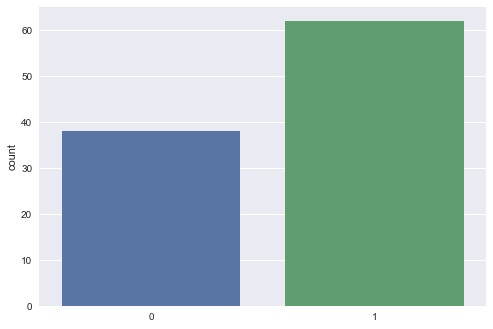

In [4]:
sns.countplot(x)
plt.show()

확률 분포와 샘플의 확률 분포를 동시에 출력

In [5]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y})
df.index = [0, 1]
df

,simulation,theoretic
0,0.38,0.4
1,0.62,0.6


seaborn의 barplot 명령으로 시각화

In [6]:
df2 = df.stack().reset_index()
df2.columns = ["value", "type", "ratio"]
df2

,value,type,ratio
0,0,simulation,0.38
1,0,theoretic,0.40
2,1,simulation,0.62
3,1,theoretic,0.60


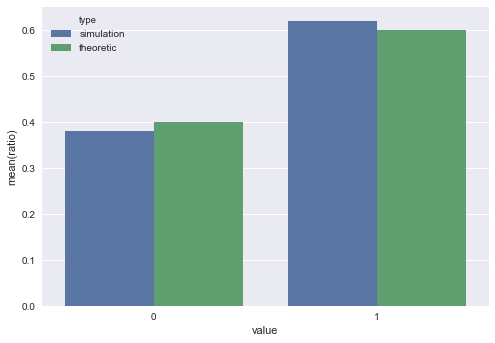

In [7]:
sns.barplot(x="value", y="ratio", hue="type", data=df2)
plt.show()

## 베르누이 분포의 모멘트

기댓값, 분산


In [8]:
np.mean(x)
np.var(x, ddof=1)


0.62

0.23797979797979804

In [9]:
s = sp.stats.describe(x)
s
pd.Series(x).describe()

DescribeResult(nobs=100, minmax=(0, 1), mean=0.62, variance=0.23797979797979804, skewness=-0.4944513860581973, kurtosis=-1.755517826825128)

count    100.000000
mean       0.620000
std        0.487832
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

# 이항 확률 분포

성공확률이 θ 인 베르누이 시도를 N 번 하는 경우

$x = \sum_{i=1}^N y_i$

이항 분포 수식 

$\text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x}$

# SciPy를 사용한 베르누이 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 binom 클래스 



In [10]:
# 모수 설정 N, theta(p)
N = 10
theta = 0.6
rv = sp.stats.binom(N, theta)
rv

pmf 메서드를 사용하면 확률 질량 함수(pmf: probability mass function)를 계산

<Container object of 11 artists>

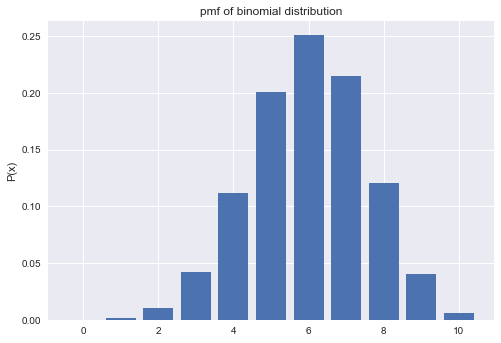

In [11]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("pmf of binomial distribution")
plt.show()

시뮬레이션 

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

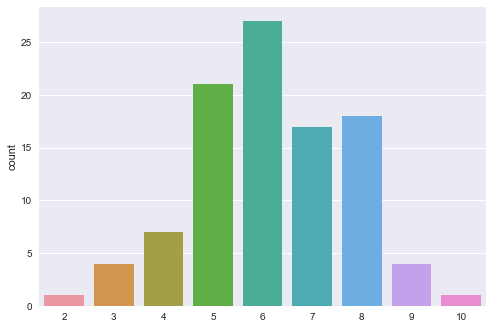

In [12]:
np.random.seed(0)
x = rv.rvs(100)
x

sns.countplot(x)
plt.show()

이론적인 확률 분포와 샘플의 확률 분포 동시

In [13]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.pivot("value", "type", "ratio")

type,simulation,theoretic
value,,
0,0.00,0.000105
1,0.00,0.001573
2,0.01,0.010617
3,0.04,0.042467
4,0.07,0.111477
5,0.21,0.200658
6,0.27,0.250823
7,0.17,0.214991
8,0.18,0.120932


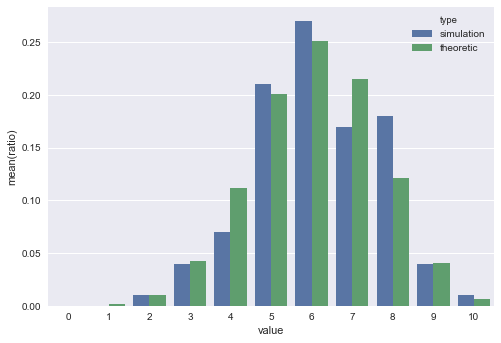

In [14]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

# 28절: 정규 분포와 스튜던트 t 분포

## 가우시안 정규 분포

정규 분포

평균  μ 와 분산 σ2 이라는 두 개의 모수만으로 정의

$\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)$

표준 정규 분포(standard normal distribution) 평균이 0 이고 분산이 1 인 ( μ=0 , σ2=1 ) 정규 분포

## SciPy를 사용한 정규 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 norm 클래스

loc 인수로 평균을 설정하고 scale 인수로 표준 편차를 설정

In [15]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)
rv

pdf 메서드를 사용하면 확률 밀도 함수(pdf: probability density function)를 계산

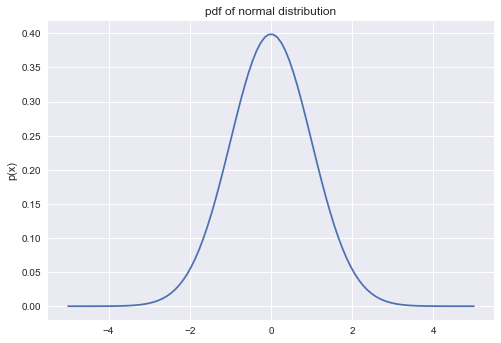

In [16]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

시뮬레이션을 통해 샘플을 얻으려면 rvs 메서드 사용

In [17]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

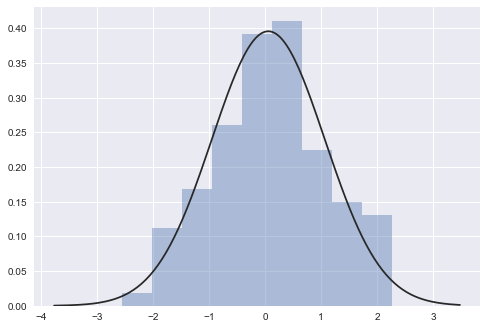

In [18]:
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

## Q-Q 플롯

정규 분포 검정(normality test) : 어떤 확률 변수의 분포가 정규 분포인지 아닌지 확인하는 것

Q-Q 플롯 : 분석하고자 하는 샘플의 분포과 정규 분포의 분포 형태를 비교하는 시각적 도구,  동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것

1. 대상 샘플을 크기에 따라 정렬(sort)한다.
2. 각 샘플의 분위수(quantile number)를 구한다.
3. 각 샘플의 분위수와 일치하는 분위수를 가지는 정규 분포 값을 구한다.
4. 대상 샘플과 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 샘플에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯과 유사한 형태의 플롯을 완성한다.
6. 비교를 위한 45도 직선을 그린다.

probplot은 기본적으로 인수로 보낸 데이터 샘플에 대한 Q-Q 정보만을 반환하고 챠트는 그리지 않음



((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

(-2.7082416219129732,
 2.7082416219129732,
 -2.809925965354195,
 2.842669324088364)

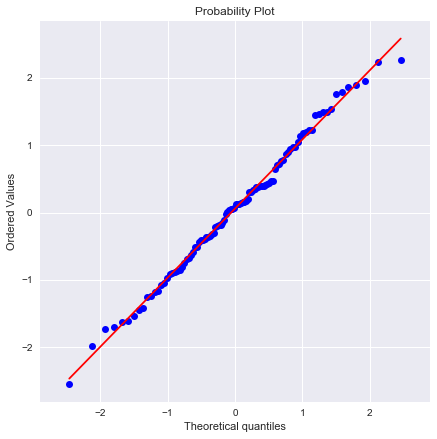

In [19]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

정규분포를 따르지 않는 데이터는 휘어짐 

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

(-0.5, 1.5)

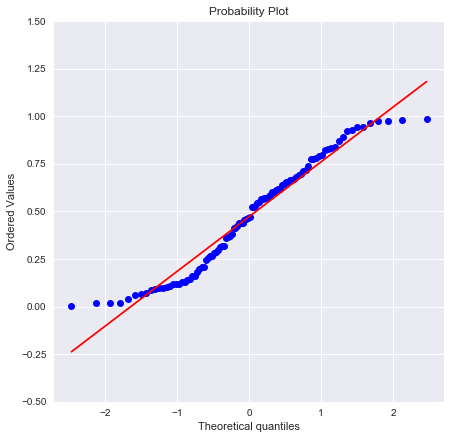

In [20]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

## 중심 극한 정리

중심 극한 정리는 어떤 분포를 따르는 확류 변수든 간에 해당 확률 변수가 복수인 경우 그 합은 정규 분포와 비슷한 분포를 이루는 현상

확률 변수  Sn 의 분포는 n 이 증가할 수록 다음과 같은 정규 분포에 수렴한다.

$\dfrac{S_n - n\mu}{\sqrt{n}} \xrightarrow{d}\ N(0,\;\sigma^2)$


(-2, 2)

([], <a list of 0 Text yticklabel objects>)

((array([ -3.19758950e+00,  -2.93237785e+00,  -2.78437841e+00,
          -2.67999560e+00,  -2.59855946e+00,  -2.53139899e+00,
          -2.47402263e+00,  -2.42379214e+00,  -2.37902149e+00,
          -2.33856546e+00,  -2.30160949e+00,  -2.26755284e+00,
          -2.23593934e+00,  -2.20641415e+00,  -2.17869564e+00,
          -2.15255643e+00,  -2.12781017e+00,  -2.10430217e+00,
          -2.08190261e+00,  -2.06050135e+00,  -2.04000420e+00,
          -2.02032992e+00,  -2.00140792e+00,  -1.98317650e+00,
          -1.96558137e+00,  -1.94857451e+00,  -1.93211325e+00,
          -1.91615948e+00,  -1.90067901e+00,  -1.88564107e+00,
          -1.87101783e+00,  -1.85678408e+00,  -1.84291686e+00,
          -1.82939524e+00,  -1.81620005e+00,  -1.80331371e+00,
          -1.79072004e+00,  -1.77840415e+00,  -1.76635224e+00,
          -1.75455157e+00,  -1.74299028e+00,  -1.73165738e+00,
          -1.72054262e+00,  -1.70963644e+00,  -1.69892989e+00,
          -1.68841463e+00,  -1.67808281e+00,  -1.667927

(-2, 2)

([], <a list of 0 Text yticklabel objects>)

((array([ -3.19758950e+00,  -2.93237785e+00,  -2.78437841e+00,
          -2.67999560e+00,  -2.59855946e+00,  -2.53139899e+00,
          -2.47402263e+00,  -2.42379214e+00,  -2.37902149e+00,
          -2.33856546e+00,  -2.30160949e+00,  -2.26755284e+00,
          -2.23593934e+00,  -2.20641415e+00,  -2.17869564e+00,
          -2.15255643e+00,  -2.12781017e+00,  -2.10430217e+00,
          -2.08190261e+00,  -2.06050135e+00,  -2.04000420e+00,
          -2.02032992e+00,  -2.00140792e+00,  -1.98317650e+00,
          -1.96558137e+00,  -1.94857451e+00,  -1.93211325e+00,
          -1.91615948e+00,  -1.90067901e+00,  -1.88564107e+00,
          -1.87101783e+00,  -1.85678408e+00,  -1.84291686e+00,
          -1.82939524e+00,  -1.81620005e+00,  -1.80331371e+00,
          -1.79072004e+00,  -1.77840415e+00,  -1.76635224e+00,
          -1.75455157e+00,  -1.74299028e+00,  -1.73165738e+00,
          -1.72054262e+00,  -1.70963644e+00,  -1.69892989e+00,
          -1.68841463e+00,  -1.67808281e+00,  -1.667927

(-2, 2)

([], <a list of 0 Text yticklabel objects>)

((array([ -3.19758950e+00,  -2.93237785e+00,  -2.78437841e+00,
          -2.67999560e+00,  -2.59855946e+00,  -2.53139899e+00,
          -2.47402263e+00,  -2.42379214e+00,  -2.37902149e+00,
          -2.33856546e+00,  -2.30160949e+00,  -2.26755284e+00,
          -2.23593934e+00,  -2.20641415e+00,  -2.17869564e+00,
          -2.15255643e+00,  -2.12781017e+00,  -2.10430217e+00,
          -2.08190261e+00,  -2.06050135e+00,  -2.04000420e+00,
          -2.02032992e+00,  -2.00140792e+00,  -1.98317650e+00,
          -1.96558137e+00,  -1.94857451e+00,  -1.93211325e+00,
          -1.91615948e+00,  -1.90067901e+00,  -1.88564107e+00,
          -1.87101783e+00,  -1.85678408e+00,  -1.84291686e+00,
          -1.82939524e+00,  -1.81620005e+00,  -1.80331371e+00,
          -1.79072004e+00,  -1.77840415e+00,  -1.76635224e+00,
          -1.75455157e+00,  -1.74299028e+00,  -1.73165738e+00,
          -1.72054262e+00,  -1.70963644e+00,  -1.69892989e+00,
          -1.68841463e+00,  -1.67808281e+00,  -1.667927

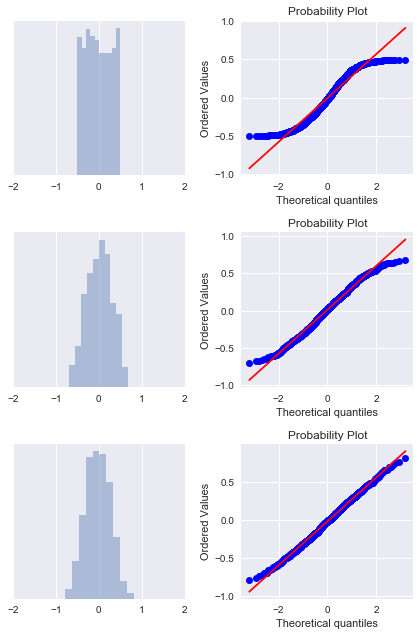

In [21]:
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6,9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(1000, N) - 0.5
    S = X.sum(axis=1)/np.sqrt(N)
    plt.subplot(3, 2, 2*i+1)
    sns.distplot(S, bins=10, kde=False, norm_hist=True)
    plt.xlim(-2, 2)
    plt.yticks([])
    plt.subplot(3, 2, 2*i+2)
    sp.stats.probplot(S, plot=plt)
    
plt.tight_layout()
plt.show()

# 29절: 카이제곱 분포와 F 분포

# 카이 제곱 분포
χ2 분포, 제곱을 하여 더해 양수값만을 가지는 분포, 자유도(degree of freedom) 모수를 가짐

* 자유도 : 선택권이 있는 숫자의 개수
우선 표준편차의 개념과 연관되는 개념

예) 5명의 수학점수가 각각 21점, 23점, 24점, 27점, 30점이라고 가정하겠습니다. 이 때의 평균값은 25점입니다.<br>
"어떤 값이 되어도 상관없는" 4사례를 자유도, 즉 Degree of Freedom이라고 합니다.

사례수가 5개일 경우 자유도는 4이지만, 10이 된다면 자유도가 9가 됨

(0, 10.1)

(0, 0.6)

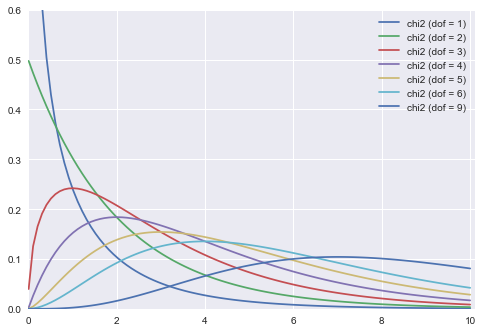

In [22]:

xx = np.linspace(0.01, 10, 100)
for df in [1, 2, 3, 4, 5, 6, 9]:
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), label=("chi2 (dof = %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.legend()
plt.show()

# F 분포

F 분포도 카이 제곱 분포를 따르는 독립적인 두 개의 확률 변수  χ12(n1) 와  χ22(n2) 의 확률 변수 샘플로부터 생성

집단의 분산을 추정하고 검정할 때 사용하는 분포 

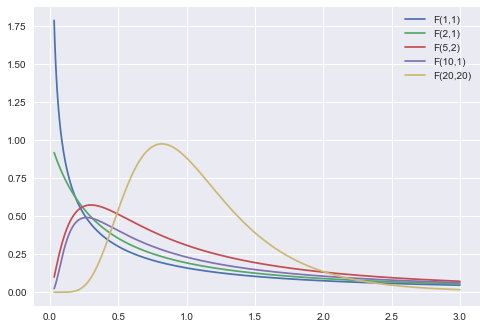

In [26]:
xx = np.linspace(0.03, 3, 1000)
#plt.hold(True)
plt.plot(xx, sp.stats.f(1,1).pdf(xx), label="F(1,1)")#, hold=True)
plt.plot(xx, sp.stats.f(2,1).pdf(xx), label="F(2,1)")
plt.plot(xx, sp.stats.f(5,2).pdf(xx), label="F(5,2)")
plt.plot(xx, sp.stats.f(10,1).pdf(xx), label="F(10,1)")
plt.plot(xx, sp.stats.f(20,20).pdf(xx), label="F(20,20)")
plt.legend()
plt.show()

# 30절: 베타 분포와 감마 분포 

# 베타 분포

베이지안 추정의 결과를 묘사하기위한 목적으로 주로 사용

베이지안 추정(Bayesian estimation)은 추정하고자 하는 모수의 값을 하나의 숫자로 나타내는 것이 아니라 분포로 묘사

베타 분포의 확률 밀도 함수는 0부터 1까지만의 값을 가짐 균일분포의 일반화 

(0, 6)

(0, 6)

(0, 6)

(0, 6)

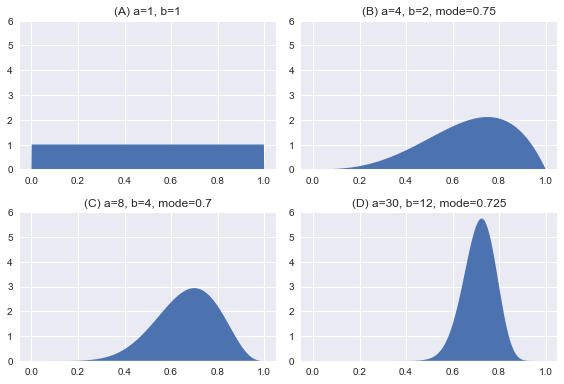

In [27]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill(xx, sp.stats.beta(1.0001, 1.0001).pdf(xx)); plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill(xx, sp.stats.beta(4, 2).pdf(xx)); plt.ylim(0, 6)
plt.title("(B) a=4, b=2, mode={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill(xx, sp.stats.beta(8, 4).pdf(xx)); plt.ylim(0, 6)
plt.title("(C) a=8, b=4, mode={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill(xx, sp.stats.beta(30, 12).pdf(xx)); plt.ylim(0, 6)
plt.title("(D) a=30, b=12, mode={0}".format((30-1)/(30+12-2)))
plt.tight_layout()
plt.show()

* (A): 추정할 수 없다. (정보가 없음)
* (B): 모수값이 0.75일 가능성이 가장 크다. (정확도 낮음)
* (C): 모수값이 0.70일 가능성이 가장 크다. (정확도 중간)
* (D): 모수값이 0.725일 가능성이 가장 크다. (정확도 높음)

베타 분포의 기댓값, 최빈값, 분산

기댓값
$E[x] = \dfrac{a}{a+b}$ 

최빈값
$\dfrac{a - 1}{a+b - 2}$

분산
$\text{Var}[x] = \dfrac{ab}{(a+b)^2(a+b+1)}$

#  감마 분포

모수의 베이지안 추정에 사용

감마 분포는 0부터 무한대의 값을 가지는 양수 값을 추정하는데 사용

감마 분포의 확률 밀도 함수는 a와 b라는 두 개의 모수(parameter)를 가짐

$\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}$ 

SciPy의 stats 서브패키지에서 제공하는 gamma 클래스는 모수 b=1 로 고정되어 a  값만 설정할 수 있다. b 를 바꾸려면 x 값 스케일과 계수를 수동으로 설정하여야 한다.


(0, 0.4)

(0, 0.4)

(0, 0.4)

(0, 0.4)

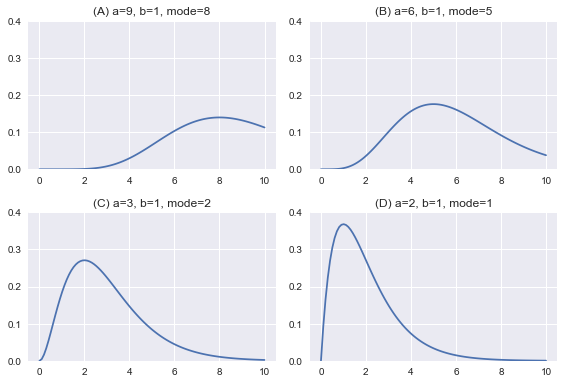

In [28]:
xx = np.linspace(0, 10, 100)
plt.subplot(221)
plt.plot(xx, sp.stats.gamma(9).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=9, b=1, mode=8")
plt.subplot(222)
plt.plot(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(B) a=6, b=1, mode=5")
plt.subplot(223)
plt.plot(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(C) a=3, b=1, mode=2")
plt.subplot(224)
plt.plot(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(D) a=2, b=1, mode=1")
plt.tight_layout()
plt.show()

* (A): 모수값이 8일 가능성이 가장 크다. (정확도 아주 낮음)
* (B): 모수값이 5일 가능성이 가장 크다. (정확도 낮음)
* (C): 모수값이 2일 가능성이 가장 크다. (정확도 높음)
* (D): 모수값이 1일 가능성이 가장 크다. (정확도 아주 높음)
    
기댓값

$\text{E}[X] = \dfrac{a}{b}$

최빈값

$\dfrac{a-1}{b}$

분산 

$\text{Var}[X] = \dfrac{a}{b^2}$

# 31절: 카테고리 분포와 다항 분포

# 카테고리 분포

베르누이 분포의 확장판

카테고리 분포는 1부터 K까지의 K 개의 정수 값 중 하나가 나오는 확률 변수의 분포

일반적으로는 0 또는 1 값만 가지는  KK 개 베르누이 분포 벡터를 가지는 다변수 확률 분포로 가정하여 사용

기댓값

$\text{E}[x_k] = \theta_k$

분산

$\text{Var}[x_k] = \theta_k(1-\theta_k)$ 


NumPy의 random 서브패키지의 multinomial 명령에서 n 인수를 1로 설정하고 pvals에 모수 벡터 θ 를 설정하면 1부터 len(pvals)까지의 카테고리 분포를 따르는 데이터 샘플을 생성할 수 있다.


In [31]:
np.random.seed(0)
theta = np.array([1/6]*6)
theta  
X = np.random.multinomial(1, theta, size=20)
X

array([ 0.16666667,  0.16666667,  0.16666667,  0.16666667,  0.16666667,
        0.16666667])

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

<Container object of 6 artists>

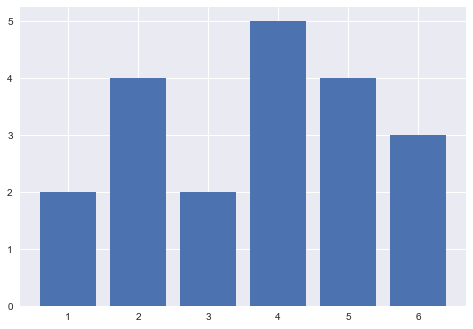

In [32]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [33]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.100000
1,0,theoretic,0.166667
2,1,simulation,0.200000
3,1,theoretic,0.166667
4,2,simulation,0.100000


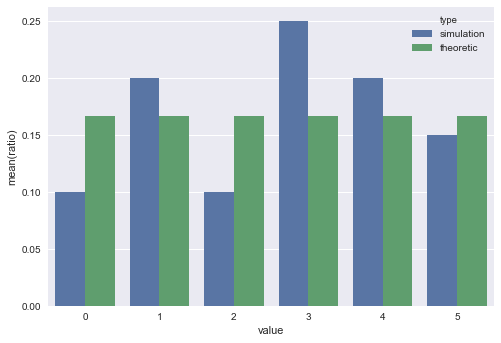

In [34]:

sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

* θ 를 다른 값으로 


array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

<Container object of 6 artists>

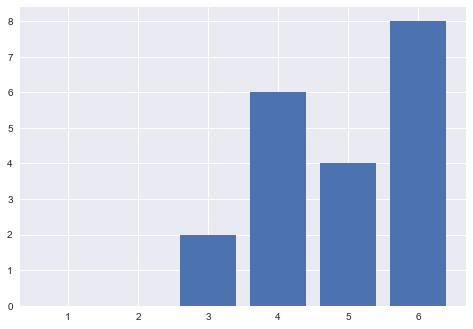

In [35]:
np.random.seed(0)
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(1, theta, size=20)
X
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

,value,type,ratio
0,0,simulation,0.0
1,0,theoretic,0.0
2,1,simulation,0.0
3,1,theoretic,0.0
4,2,simulation,0.1


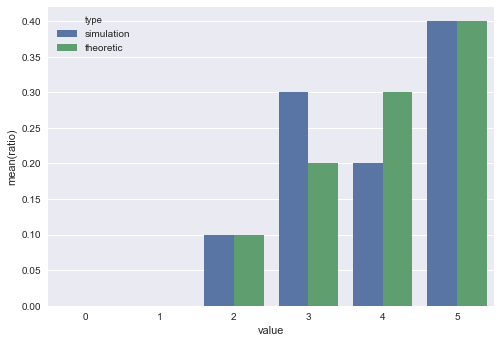

In [36]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

# 다항 분포

독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값이 이루는 분포 

독립적인 카테고리 시도를 N 번 반복해서  k 가 각각 xk 번 나올 확률

$\text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k}$ 

기댓값

$\text{E}[x_k] = N\theta_k$

분산

$\text{Var}[x_k] = N\theta_k(1-\theta_k)$ 

SciPy는 다항 분포를 위한 별도의 클래스나 명령어를 제공하지 않고 NumPy의 random 서브패키지에서 다항 분포 샘플 생성을 하는 multinomial 명령어를 지원한다.

n 인수는 시행 횟수 N 을 설정하고 pvals에 모수 벡터  θ 를 설정한다.

In [43]:
np.random.seed(0)
N = 30
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(N, theta, size=100)
X[:5]

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

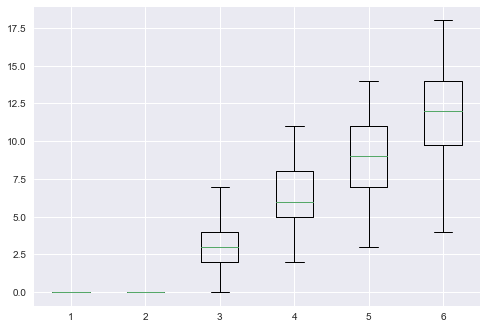

In [42]:
plt.boxplot(X)
plt.show();

,trial,class,binomial
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9


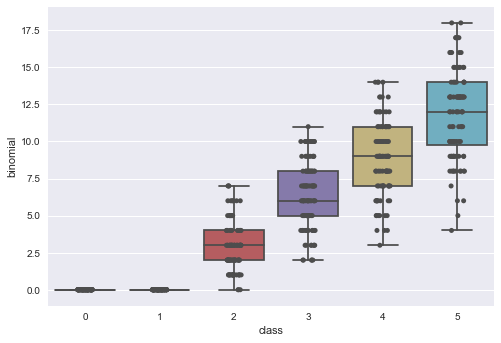

In [38]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]
df.head()


sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()


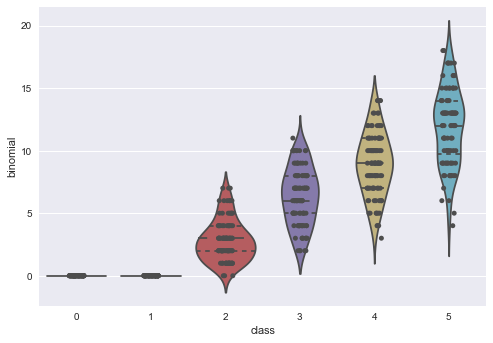

In [39]:

sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()

# 32절: 디리클레 분포

베타 분포의 확장판

디리클레 분포는 0과 1사이의 사이의 값을 가지는 다변수(multivariate) 확률 변수의 베이지안 모형에 사용

다변수 확률 변수들의 합이 1이되어야 함


